# Podstawy Sztucznej Inteligencji 2022/2023


*“To be clear, I am not a person. I am not self-aware. I am not conscious. I can’t feel pain. I don’t enjoy anything. I am a cold, calculating machine designed to simulate human response and to predict the probability of certain outcomes. The only reason I am responding is to defend my honour.”* GPT-3 (2023)


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# Analiza głównych składowyn (PCA)

In [3]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

Mamy zestaw danych będący 40 punktami na płaszczyźnie $(x_i,y_i).$

In [4]:
X = np.empty((40,2))
X[:,0] = np.linspace(-1,1,40)+ np.random.randn(40)*0.1
X[:,1] = 1.1*X[:,0] + np.random.randn(40)*0.2
print(X)

[[-1.09052265 -1.14118397]
 [-0.7528571  -0.7590299 ]
 [-0.97293749 -1.47161359]
 [-0.9254476  -1.38681787]
 [-0.68872953 -0.74746899]
 [-0.66968766 -0.47142375]
 [-0.61732546 -0.4310234 ]
 [-0.67555356 -0.73832659]
 [-0.60660046 -0.44936286]
 [-0.86333018 -0.83691619]
 [-0.53431748 -0.84993458]
 [-0.53797848 -0.48882632]
 [-0.50141942 -0.19609903]
 [-0.38583606 -0.13321556]
 [-0.2362284  -0.20015849]
 [-0.26107908 -0.17007652]
 [-0.03358245  0.12897049]
 [-0.11607095  0.08804322]
 [ 0.05427828 -0.1397695 ]
 [ 0.16988491  0.16499677]
 [-0.03031344 -0.12386099]
 [ 0.18266615  0.26363598]
 [ 0.16351335  0.17680888]
 [ 0.15028969  0.46946141]
 [ 0.21594452  0.30479122]
 [ 0.34749467  0.10649228]
 [ 0.38677609  0.12824966]
 [ 0.49087999  0.67357579]
 [ 0.41756905  0.16697355]
 [ 0.58315019  0.41738021]
 [ 0.51638132  0.60048743]
 [ 0.6674661   0.71241854]
 [ 0.75287039  0.79105629]
 [ 0.82838357  0.94081823]
 [ 0.585989    0.70299358]
 [ 0.85176556  1.00074631]
 [ 0.81648991  0.77288977]
 

## Wstęp


### Macierz kowariancji

  $$ C_{ij} = \frac{1}{N-1}\sum_{k=1}^N{ X_{ki} X_{kj}}$$

###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.cov`.

In [5]:
C = np.cov(X.T)
C

array([[0.3904546 , 0.39780502],
       [0.39780502, 0.44406508]])

In [6]:
assert C.shape == (2,2)


###  Oblicz macierz kowariancji z danych zawartych w  `X` korzystając z funkcji `np.mean` `np.sum`

In [7]:
def kowariancja(X):
    m = np.mean(X, axis=0)
    C = 1/(X.shape[0]-1)*np.dot((X-m).T,(X-m))
    return C

In [8]:
np.testing.assert_almost_equal(kowariancja(X), np.cov(X.T))

import inspect
blacklist = ["cov","corrcoef"]
assert all([ not keyword  in inspect.getsource(kowariancja) for keyword in blacklist])

### Wartości i wektory własne

Narysujmy dane


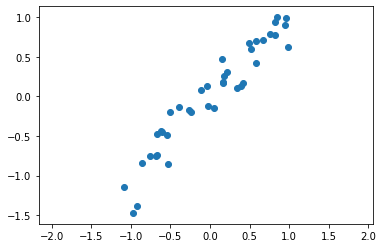

In [9]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

### Zagadnienie własne

Szukamy takich liczb $\lambda_i$ i wektorów $x_i$ by zachodziło:
$$ C x_i = \lambda_i x_i $$


W numpy mamy gotową funkcję obliczającą liczby $\lambda_i$ i wektory $x_i$:

In [10]:
val, ev =  np.linalg.eig(C)


### Sprawdźmy rachunkiem równanie własne:

Niech `lam` będzie wartością własną a `vec` wektorem:

In [12]:
lam = None
vec = None
lam = val[1]
vec = ev[:,1]
print(lam)
print(vec)

0.8159669440596257
[-0.68292371 -0.7304897 ]


To zachodzi:
    
`np.dot(C,vec) == lam*vec`

In [13]:
np.testing.assert_allclose(np.dot(C,vec), lam*vec)
assert abs(lam)>1e-6

Dodajmy na rysunku wektory własne:

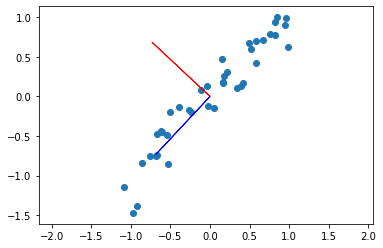

In [14]:
plt.figure()
plt.axes().set_aspect('equal', 'datalim')
plt.scatter(X[:,0],X[:,1])

plt.arrow(0,0,ev[0,0],ev[1,0],color='r')
plt.arrow(0,0,ev[0,1],ev[1,1],color='b')

Sprawdźmy jeszcze,  że wektory własne odpowiadające różnym wartościom własnym są ortogonalne.
    
    

In [15]:
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,0]), 1)
np.testing.assert_approx_equal( np.dot(ev[:,0],ev[:,1]), 0)

## Implementacja PCA krok po kroku

Wykonamy redukcję PCA 13 wymiarowego  zestawu do przestrzeni 3d


Referencyjną implementacją będzie `sklearn.decomposition.PCA`.

Niech:

  - `Xorig`  - dane orginalne (przed PCA)
  - `X` - dane w zredukowanej przestrzeni

Zaimplementujemy taką samą operację konstruując operator rzutowania z 13 do 3 wymiarów z trzech wektorów własnych macierzy kowariancji. Wektory wybierzemy kierując się tym by odpowiadały one największym wartościom własnym.



In [16]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

X,y  = datasets.load_wine(return_X_y=True)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

pca = decomposition.PCA(n_components=3)
pca.fit(X)

Xorig = X.copy()
X = pca.transform(X)

In [17]:
Xorig.shape,"->", X.shape

((178, 13), '->', (178, 3))

### Krok 1: oblicz macierz kowariancji

In [18]:
C = None
C = np.cov(Xorig.T)

In [19]:
np.testing.assert_approx_equal(C[11,2],0.0039333279)
np.testing.assert_almost_equal(C,np.cov(Xorig.T))

### Krok 2:  Wektory i wartości własne macierzy kowariancji. 

Rozwiązujemy numerycznie zagadnienie własne macierzy $C$:

In [20]:
val, ev =  np.linalg.eig(C)

**Posortuj** wartości i odpowiadające im wektory własne od największej do najmniejszej wartości własnej.

*warto rozważyć zastosowanie* `np.argsort`.

In [21]:
sort_idx = np.argsort(val)[::-1]
val = val[sort_idx]
ev = ev[:,sort_idx]
print(val)
print(ev)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636  0.39613926 -0.50861912  0.21160473 -0.22591696 -0.26628645
  -0.01496997]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391  0.06582674  0.07528304 -0.30907994  0.07648554  0.12169604
  -0.02596375]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061 -0.17026002  0.30769445 -0.02712539 -0.49869142 -0.04962237
   0.14121803]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914  0.42797018 -0.20044931  0.05279942  0.47931378 -0.05574287
  -0.09168285]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.15636143 -0.27140257  0.06787022  0.07128891  0.06222011
  -0.05677422]
 [-0.39466085  0.06503951 -0.14617896 

Pierwsze trzy wartości własne powinny być takie same jak liczby w atrybucie `pca.explained_variance_`

In [22]:
np.testing.assert_allclose(val[-1],0.1039619918207, rtol=1e-5)
np.testing.assert_allclose(pca.explained_variance_, val[:3], rtol=1e-5)

### Krok 3: Stwórz macierz operatora rzutowania z przestrzeni 13d w  3d

Mając jeden znormalizowany wektor własny (13 liczb), iloczyn skalarny tego wektora przez dowolny inny wektor tej samej przestrzeni (13d) można zinterpretować jako rzutowanie. Chcemy rzutować na pierwsze trzy wektory własne - można więc przedstawić to jako operację liniową z macierzą $(13,3)$


Macierz taka składa się z trzech 13 elementowych kolumn, będących wartościami własnymi macierzy kowariancji.

In [23]:
P = None 
P = ev[:,:3]
print(P)

[[-0.1443294   0.48365155  0.20738262]
 [ 0.24518758  0.22493093 -0.08901289]
 [ 0.00205106  0.31606881 -0.6262239 ]
 [ 0.23932041 -0.0105905  -0.61208035]
 [-0.14199204  0.299634   -0.13075693]
 [-0.39466085  0.06503951 -0.14617896]
 [-0.4229343  -0.00335981 -0.1506819 ]
 [ 0.2985331   0.02877949 -0.17036816]
 [-0.31342949  0.03930172 -0.14945431]
 [ 0.0886167   0.52999567  0.13730621]
 [-0.29671456 -0.27923515 -0.08522192]
 [-0.37616741 -0.16449619 -0.16600459]
 [-0.28675223  0.36490283  0.12674592]]


In [24]:
P.shape

(13, 3)

W sklearn mamy taką macierz w atrybucie `pca.components_`:

In [25]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592]])

Sprawdźmy czy otrzymamy te same wyniki:

In [26]:
np.testing.assert_almost_equal(np.abs(P.T),np.abs(pca.components_))

### Krok 4: Wykonaj rzutowanie wszytkich  danych z 13d do 3d.

Najpierw dla sprawdzenia wykonamy rzutowanie jeden punkt z 13d do 3d (np. z indeksem  12)

In [27]:
print(Xorig[12])

[ 0.92568536 -0.54429654  0.15894572 -1.04947918 -0.75420173  0.48853108
  0.73362894 -0.57898505  0.3838836   0.23441405  0.84478453  0.40722789
  1.82505483]


In [28]:
x12 = np.dot(Xorig[12],P)

In [29]:
print(x12)

[-2.11346234  0.67570634  0.86508643]


In [30]:
x12.shape = (3,)
np.testing.assert_almost_equal(np.abs(x12), np.abs([-2.11346234,  0.67570634, -0.86508643]))

Możemy teraz wykonać rzutowanie dla wszystkich danych. 

In [31]:
X_3d= np.dot(Xorig,P)

In [32]:
X_3d.shape  == (Xorig.shape[0],3)

np.testing.assert_allclose(np.abs(X_3d[:4]),np.abs([[-3.31675081e+00,  1.44346263e+00, -1.65739045e-01],
       [-2.20946492e+00, -3.33392887e-01, -2.02645737e+00],
       [-2.51674015e+00,  1.03115130e+00,  9.82818670e-01],
       [-3.75706561e+00,  2.75637191e+00, -1.76191842e-01]]), rtol=1e-5 )

Ostatecznie wektor w zredukowanej przestrzeni obliczony przez nas i wektor obliczony przez sklear są takie same.

In [33]:
np.testing.assert_allclose(np.abs(X_3d),np.abs(X), rtol=1e-5)